In [2]:
import os
from os import listdir

import keras
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Keras
from keras import regularizers
from keras.models import model_from_json

import wave
import pyaudio

Using TensorFlow backend.


In [3]:
json_file = open('saved_models/model_audio_aug.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("saved_models/model_audio_augweights.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [4]:
EMOTION_DICT = {0:"ANGRY", 1:"DISGUST", 2:"FEAR", 3:"HAPPY", 6:"NEUTRAL", 4:"SAD", 5:"SURPRISE"}
# model_top = load_model('C:\\Users\\AAKASH\\Desktop\\minor_project\\saved_models\\model_weights.h5')

In [5]:
# function to plot bar graph

def plot_bar_graph(probs):
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    probs = probs * 100
    index = np.arange(len(labels))
    plt.bar(index, probs)
    plt.xlabel('Emotions')
    plt.ylabel('Probability (in %)')
    plt.xticks(index, labels, rotation=30)
    plt.title('Predicted probabilities vs emotions')
    plt.show()

In [6]:
def predict(file):
    X, sample_rate = librosa.load(file, res_type='kaiser_fast',duration=3,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = np.array(mfccs)
    if(feature.size != 259):
        if(feature.size < 259):
            temp = np.full((259 - feature.size,), np.mean(feature))
            feature = np.concatenate((feature, temp), axis = 0)
        else:
            feature = feature[: 259 - feature.size]
    feature = feature.reshape((1, feature.shape[0], 1))
    preds = model.predict(feature)
    return EMOTION_DICT[np.argmax(preds)], preds[0]

recording...
finished recording
Predicted emotion:  SURPRISE
[0.03599133 0.16783106 0.04146561 0.02954024 0.02908669 0.6353714
 0.06071367]


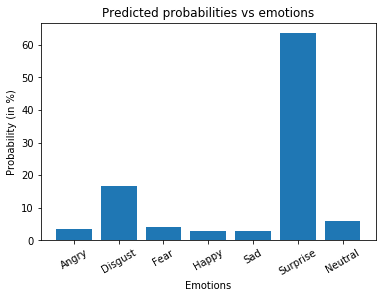

In [7]:
# https://stackoverflow.com/questions/892199/detect-record-audio-in-python

FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "file.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
print ("recording...")
frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print ("finished recording")
 

# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

x, y = predict('file.wav')
print('Predicted emotion: ', x)
print(y)
plot_bar_graph(y)